In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate



In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/home/561/erd561/figures/CMIP5/'

hist_thetao_path = '/g/data/e14/erd561/CMIP5/camelia/historical/mon/ocean/thetao/latest/'
hist_tauuo_path = '/g/data/e14/erd561/CMIP5/bromeliad/historical/mon/ocean/tauuo/latest/'
hist_zos_path = '/g/data/e14/erd561/CMIP5/bromeliad/historical/mon/ocean/zos/latest/'
hist_uas_path = '/g/data/e14/erd561/CMIP5/banksia/hist_1980-1999/mon/atmos/uas/latest/'
hist_vas_path = '/g/data/e14/erd561/CMIP5/banksia/hist_1980-1999/mon/atmos/vas/latest/'
hist_thetao_list = sorted(os.listdir(hist_thetao_path))
hist_tauuo_list = sorted(os.listdir(hist_tauuo_path))
hist_zos_list = sorted(os.listdir(hist_zos_path))
hist_uas_list = sorted(os.listdir(hist_uas_path))
hist_vas_list = sorted(os.listdir(hist_vas_path))

rcp85_thetao_path = '/g/data/e14/erd561/CMIP5/camelia/rcp85/mon/ocean/thetao/latest/'
rcp85_tauuo_path = '/g/data/e14/erd561/CMIP5/bromeliad/rcp85/mon/ocean/tauuo/latest/'
rcp85_zos_path = '/g/data/e14/erd561/CMIP5/bromeliad/rcp85/mon/ocean/zos/latest/'
rcp85_uas_path = '/g/data/e14/erd561/CMIP5/banksia/rcp85/mon/atmos/uas/latest/'
rcp85_vas_path = '/g/data/e14/erd561/CMIP5/banksia/rcp85/mon/atmos/vas/latest/'
rcp85_thetao_list = sorted(os.listdir(rcp85_thetao_path))
rcp85_tauuo_list = sorted(os.listdir(rcp85_tauuo_path))
rcp85_zos_list = sorted(os.listdir(rcp85_zos_path))
rcp85_uas_list = sorted(os.listdir(rcp85_uas_path))
rcp85_vas_list = sorted(os.listdir(rcp85_vas_path))

hist_zossga_path = '/g/data/e14/erd561/CMIP5/bromeliad/historical/mon/ocean/zossga/latest/'
hist_zossga_list = sorted(os.listdir(hist_zossga_path))
hist_zostoga_path = '/g/data/e14/erd561/CMIP5/bromeliad/historical/mon/ocean/zostoga/latest/'
hist_zostoga_list = sorted(os.listdir(hist_zostoga_path))

rcp85_zossga_path = '/g/data/e14/erd561/CMIP5/bromeliad/rcp85/mon/ocean/zossga/latest/'
rcp85_zossga_list = sorted(os.listdir(rcp85_zossga_path))
rcp85_zostoga_path = '/g/data/e14/erd561/CMIP5/bromeliad/rcp85/mon/ocean/zostoga/latest/'
rcp85_zostoga_list = sorted(os.listdir(rcp85_zostoga_path))

good_list = []
thetao_hist_good_list = []
for hist_thetao in hist_thetao_list:
    if \
    any(hist_thetao[:-28] in hist_tauuo for hist_tauuo in hist_tauuo_list) and \
    any(hist_thetao[:-28] in hist_uas for hist_uas in hist_uas_list) and \
    any(hist_thetao[:-28] in hist_vas for hist_vas in hist_vas_list) and \
    any(hist_thetao[:-28] in rcp85_thetao for rcp85_thetao in rcp85_thetao_list) and \
    any(hist_thetao[:-28] in rcp85_tauuo for rcp85_tauuo in rcp85_tauuo_list) and \
    any(hist_thetao[:-28] in rcp85_uas for rcp85_uas in rcp85_uas_list) and \
    any(hist_thetao[:-28] in rcp85_vas for rcp85_vas in rcp85_vas_list):
        print(hist_thetao[:-29])
        thetao_hist_good_list.append(hist_thetao)
        good_list.append(hist_thetao[:-29])

tauuo_hist_good_list = []
zos_hist_good_list = []
thetao_rcp85_good_list = []
tauuo_rcp85_good_list = []
zos_rcp85_good_list = []
for good in good_list:
    tauuo_hist_good_list.append([
        hist_tauuo for hist_tauuo in hist_tauuo_list if hist_tauuo[:-23] in good + '_'][0])
    thetao_rcp85_good_list.append(
        [rcp85_thetao for rcp85_thetao in rcp85_thetao_list if rcp85_thetao[:-28] in good + '_'][0])
    tauuo_rcp85_good_list.append(
        [rcp85_tauuo for rcp85_tauuo in rcp85_tauuo_list if rcp85_tauuo[:-23] in good + '_'][0])
    if good not in ['GFDL-CM3', 'HadGEM2-AO']:
        zos_hist_good_list.append([
            hist_zos for hist_zos in hist_zos_list if hist_zos[:-23] in good + '_'][0])
        zos_rcp85_good_list.append(
            [rcp85_zos for rcp85_zos in rcp85_zos_list if rcp85_zos[:-23] in good + '_'][0])
    elif good == 'GFDL-CM3':
        zos_hist_good_list.append('GFDL-CM3')
        zos_rcp85_good_list.append('GFDL-CM3')
    elif good == 'HadGEM2-AO':
        zos_hist_good_list.append('HadGEM2-AO')
        zos_rcp85_good_list.append('HadGEM2-AO')
# print(zos_rcp85_good_list)
# print(thetao_rcp85_good_list)
# print(tauuo_rcp85_good_list)

print(zos_rcp85_good_list)

p25_MMM_and_individual_models
ACCESS1-0
ACCESS1-3
CMCC-CMS
CMCC-CM
CNRM-CM5
CSIRO-Mk3-6-0
CanESM2
FGOALS-s2
GFDL-CM3
GFDL-ESM2G
GFDL-ESM2M
HadGEM2-AO
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM-CHEM
MIROC-ESM
MIROC5
MPI-ESM-LR
MPI-ESM-MR
MRI-CGCM3
MRI-ESM1
NorESM1-M
inmcm4
['ACCESS1-0_r1i1p1_2080-2099mean.nc', 'ACCESS1-3_r1i1p1_2080-2099mean.nc', 'CMCC-CMS_r1i1p1_2080-2099mean.nc', 'CMCC-CM_r1i1p1_2080-2099mean.nc', 'CNRM-CM5_r1i1p1_2080-2099mean.nc', 'CSIRO-Mk3-6-0_r1i1p1_2080-2099mean.nc', 'CanESM2_r1i1p1_2080-2099mean.nc', 'FGOALS-s2_r1i1p1_2080-2099mean.nc', 'GFDL-CM3', 'GFDL-ESM2G_r1i1p1_2080-2099mean.nc', 'GFDL-ESM2M_r1i1p1_2080-2099mean.nc', 'HadGEM2-AO', 'IPSL-CM5A-LR_r1i1p1_2080-2099mean.nc', 'IPSL-CM5A-MR_r1i1p1_2080-2099mean.nc', 'IPSL-CM5B-LR_r1i1p1_2080-2099mean.nc', 'MIROC-ESM-CHEM_r1i1p1_2080-2099mean.nc', 'MIROC-ESM_r1i1p1_2080-2099mean.nc', 'MIROC5_r1i1p1_2080-2099mean.nc', 'MPI-ESM-LR_r1i1p1_2080-2099mean.nc', 'MPI-ESM-MR_r1i1p1_2080-2099mean.nc', 'MRI-CGCM3_r1i1

In [4]:
thetao_hist = {}
thetao_rcp85 = {}
thetao_anom = {}
thetao_lat = {}
thetao_lon = {}

tauuo_hist = {}
tauuo_rcp85 = {}
tauuo_anom = {}
tauuo_lat = {}
tauuo_lon = {}

zos_hist = {}
zos_rcp85 = {}
zos_anom = {}
zos_lat = {}
zos_lon = {}

zossga_hist = {}
zossga_rcp85 = {}

zostoga_hist = {}
zostoga_rcp85 = {}

plot_list = []
for (model_thetao_hist, model_tauuo_hist, model_zos_hist, 
     model_thetao_rcp85, model_tauuo_rcp85, model_zos_rcp85, model) \
in zip(thetao_hist_good_list, tauuo_hist_good_list, zos_hist_good_list, 
       thetao_rcp85_good_list, tauuo_rcp85_good_list, zos_rcp85_good_list, 
       good_list):
    print(model + '...')
    
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    # if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4', 'FIO-ESM', 'CESM1-WACCM']:
    if model in ['MIROC5', 'inmcm4', 'MPI-ESM-LR']:
        print('No.')
        continue
    
    plot_list.append(model)
    
    thetao_hist_data = xr.open_dataset(hist_thetao_path + model_thetao_hist, decode_times=False)
    thetao_rcp85_data = xr.open_dataset(rcp85_thetao_path + model_thetao_rcp85, decode_times=False)
    thetao_hist[model] = thetao_hist_data['thetao'][0,0,:,:]
    thetao_rcp85[model] = thetao_rcp85_data['thetao'][0,0,:,:]
    
    tauuo_hist_data = xr.open_dataset(hist_tauuo_path + model_tauuo_hist, decode_times=False)
    tauuo_rcp85_data = xr.open_dataset(rcp85_tauuo_path + model_tauuo_rcp85, decode_times=False)
    tauuo_hist[model] = tauuo_hist_data['tauuo'][0,:,:]
    tauuo_rcp85[model] = tauuo_rcp85_data['tauuo'][0,:,:]
    
    if model not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        zos_hist_data = xr.open_dataset(hist_zos_path + model_zos_hist, decode_times=False)
        zos_rcp85_data = xr.open_dataset(rcp85_zos_path + model_zos_rcp85, decode_times=False)
        pre_pre_zos_hist = zos_hist_data['zos'][0,:,:]*100
        pre_pre_zos_rcp85 = zos_rcp85_data['zos'][0,:,:]*100
        if model in ['MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
            pre_pre_zos_hist = pre_pre_zos_hist.where((pre_pre_zos_hist != 0), np.nan)
            pre_pre_zos_rcp85 = pre_pre_zos_rcp85.where((pre_pre_zos_rcp85 != 0), np.nan)
        pre_zos_hist = pre_pre_zos_hist - np.mean(pre_pre_zos_hist)
        pre_zos_rcp85 = pre_pre_zos_rcp85 - np.mean(pre_pre_zos_rcp85)

        zos_hist_plus_sga = 0
        zos_rcp85_plus_sga = 0
        zos_hist_plus_toga = 0
        zos_rcp85_plus_toga = 0
        for hist_zossga in hist_zossga_list:
            if model == hist_zossga[:-24]:
    #             print(hist_zossga[:-24])
                zossga_hist_data = xr.open_dataset(hist_zossga_path + hist_zossga, decode_times=False)
                zossga_hist[model] = zossga_hist_data['zossga'][0]*100
    #             print('hist zossga')
                zos_hist_plus_sga = 1

        for rcp85_zossga in rcp85_zossga_list:
            if model == rcp85_zossga[:-24]:
    #             print(rcp85_zossga[:-24])
                zossga_rcp85_data = xr.open_dataset(rcp85_zossga_path + rcp85_zossga, decode_times=False)
                zossga_rcp85[model] = zossga_rcp85_data['zossga'][0]*100
    #             print('rcp85 zossga')
                zos_rcp85_plus_sga = 1

        for hist_zostoga in hist_zostoga_list:
            if model == hist_zostoga[:-24]:
    #             print(hist_zostoga[:-24])
                zostoga_hist_data = xr.open_dataset(hist_zostoga_path + hist_zostoga, decode_times=False)
                zostoga_hist[model] = zostoga_hist_data['zostoga'][0]*100
    #             print('hist zostoga')
                zos_hist_plus_toga = 1

        for rcp85_zostoga in rcp85_zostoga_list:
            if model == rcp85_zostoga[:-24]:
    #             print(rcp85_zostoga[:-24])
                zostoga_rcp85_data = xr.open_dataset(rcp85_zostoga_path + rcp85_zostoga, decode_times=False)
                zostoga_rcp85[model] = zostoga_rcp85_data['zostoga'][0]*100
                zos_rcp85_plus_toga = 1
    #             print('rcp85 zostoga')

        if zos_hist_plus_sga == 1 and zos_rcp85_plus_sga == 1:
            print('ZOSSGA')
            zos_hist[model] = pre_zos_hist
            zos_rcp85[model] = pre_zos_rcp85
#             zos_hist[model] = pre_zos_hist + zossga_hist[model]
#             zos_rcp85[model] = pre_zos_rcp85 + zossga_rcp85[model]

        elif zos_hist_plus_toga == 1 and zos_rcp85_plus_toga == 1:
            print('ZOSTOGA')
            zos_hist[model] = pre_zos_hist
            zos_rcp85[model] = pre_zos_rcp85
#             zos_hist[model] = pre_zos_hist + zostoga_hist[model]
#             zos_rcp85[model] = pre_zos_rcp85 + zostoga_rcp85[model]

        else:
            print('NONE')
            zos_hist[model] = pre_zos_hist
            zos_rcp85[model] = pre_zos_rcp85 
            
        zos_anom[model] = zos_rcp85[model]-zos_hist[model]

    
    thetao_anom[model] = thetao_rcp85[model]-thetao_hist[model]
    tauuo_anom[model] = tauuo_rcp85[model]-tauuo_hist[model]
    
    if len(thetao_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][-1,:]
        else:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][0,:]
    else:
        thetao_lat[model] = thetao_hist_data['lat'][:]
        thetao_lon[model] = thetao_hist_data['lon'][:]
    
    if len(tauuo_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][-1,:]
        else:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][0,:]
    else:
        tauuo_lat[model] = tauuo_hist_data['lat'][:]
        tauuo_lon[model] = tauuo_hist_data['lon'][:]
    
    if model not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        if len(zos_hist_data['lat'].shape) is 2:
            # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
            if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
                zos_lat[model] = zos_hist_data['lat'][:,0]
                zos_lon[model] = zos_hist_data['lon'][-1,:]
            else:
                zos_lat[model] = zos_hist_data['lat'][:,0]
                zos_lon[model] = zos_hist_data['lon'][0,:]
        else:
            zos_lat[model] = zos_hist_data['lat'][:]
            zos_lon[model] = zos_hist_data['lon'][:]
    
    # The GFDL models run need this lon offset fix ...
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'bcc-csm1-1-m', 'bcc-csm1-1']:
        thetao_lon[model][0:100] += 360
        tauuo_lon[model][0:100] += 360
        
        if model not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
            zos_lon[model][0:100] += 360
    
#     # MPI-ESM-LR lon needs to be offset...
#     if model in ['MPI-ESM-LR']:
#         thetao_lon[model].roll(lon=100)
#         tauuo_lon[model].roll(i=100)
    
    # Also, MPI-ESM-LR and MPI-ESM-MR are flipped upside down...
    # Couldn't find a flip function in xarray...
    if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
        thetao_anom_now = thetao_anom[model]
        thetao_anom[model] = np.flipud(thetao_anom_now)
        tauuo_anom_now = tauuo_anom[model]
        tauuo_anom[model] = np.flipud(tauuo_anom_now)
        zos_anom_now = zos_anom[model]
        zos_anom[model] = np.flipud(zos_anom_now)
        
        thetao_lat_now = thetao_lat[model]
        thetao_lat[model] = np.flipud(thetao_lat_now)
        tauuo_lat_now = tauuo_lat[model]
        tauuo_lat[model] = np.flipud(tauuo_lat_now)
        zos_lat_now = zos_lat[model]
        zos_lat[model] = np.flipud(zos_lat_now)
        
    # HadGEM2-AO, MRI-CGCM3 and MRI-ESM1 need to have their wind stress land masked...
    if model in ['HadGEM2-AO', 'MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        # anything that satisfies the condition is SAFE
        tauuo_anom[model] = tauuo_anom[model].where((tauuo_anom[model] != 0), np.nan)
    
    # MRI-CGCM3 and MRI-ESM1 need to have their SST land masked...
    if model in ['MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        thetao_anom[model] = thetao_anom[model].where((thetao_anom[model] != 0), np.nan)
        
    print('OK!')

    
print(plot_list)
print(len(plot_list))   
        

ACCESS1-0...
ZOSSGA
OK!
ACCESS1-3...
ZOSSGA
OK!
CMCC-CMS...
ZOSSGA
OK!
CMCC-CM...
ZOSSGA
OK!
CNRM-CM5...
ZOSSGA
OK!
CSIRO-Mk3-6-0...
ZOSTOGA
OK!
CanESM2...
ZOSSGA
OK!
FGOALS-s2...
OK!
GFDL-CM3...
OK!
GFDL-ESM2G...
OK!
GFDL-ESM2M...
OK!
HadGEM2-AO...
OK!
IPSL-CM5A-LR...
ZOSSGA
OK!
IPSL-CM5A-MR...
OK!
IPSL-CM5B-LR...
OK!
MIROC-ESM-CHEM...
ZOSSGA
OK!
MIROC-ESM...
ZOSSGA
OK!
MIROC5...
No.
MPI-ESM-LR...
No.
MPI-ESM-MR...
ZOSSGA
OK!
MRI-CGCM3...
OK!
MRI-ESM1...
OK!
NorESM1-M...
ZOSSGA
OK!
inmcm4...
No.
['ACCESS1-0', 'ACCESS1-3', 'CMCC-CMS', 'CMCC-CM', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M']
21


In [5]:
a = np.random.randint(0,100,100)
b = np.random.randint(0,100,100)
a

array([20, 96, 20, 75, 25, 85, 61, 57, 64, 24, 88, 97, 67, 40,  6, 33,  9,
       53, 30, 65, 63, 74, 41, 79, 77, 91, 34, 46, 33, 97, 74, 64, 62, 42,
       83, 54, 35, 44, 48, 39, 56, 77, 78, 49, 21, 94, 16, 28, 46, 58, 24,
       94, 88, 47, 19, 67, 94, 88, 54, 10, 49, 80, 62, 44, 53, 54, 33, 22,
        3, 46, 54, 75, 39, 22,  0, 61,  8,  4, 21,  2, 32, 10, 66, 82, 75,
       58, 29, 78,  2,  0, 41, 79, 69, 22,  3, 27, 29, 28, 71, 63])

KeyError: 'FGOALS-s2'

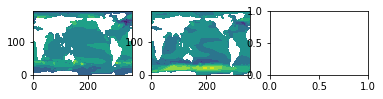

In [51]:
model_check = 'FGOALS-s2'

#thetao_anom[model_check] = thetao_anom[model_check].where((thetao_anom[model_check] != 0), np.nan)

plt.subplot(3,3,1)
plt.contourf(thetao_anom[model_check])
plt.subplot(3,3,2)
plt.contourf(tauuo_anom[model_check])
plt.subplot(3,3,3)
plt.contourf(zos_anom[model_check])
plt.subplot(3,3,4)
plt.plot(thetao_lon[model_check])
plt.subplot(3,3,5)
plt.plot(tauuo_lon[model_check])
plt.subplot(3,3,6)
plt.plot(zos_lon[model_check])
plt.subplot(3,3,7)
plt.plot(thetao_lat[model_check])
plt.subplot(3,3,8)
plt.plot(tauuo_lat[model_check])
plt.subplot(3,3,9)
plt.plot(zos_lat[model_check])

In [6]:
# SA pool area:
lat_SAN = -31
lat_SAS = -41
lon_SAW = 112
lon_SAE = 145

# TS pool area:
lat_TSN = -32
lat_TSS = -45
lon_TSW = 148
lon_TSE = 157

# SA TS pools:
tauuo_SA = {}
thetao_SA = {}
thetao_TS = {}
zos_TS = {}

for idx, t in enumerate(plot_list):
    print(t)
    
    lat_SAN_idx = find_nearest_index(tauuo_lat[t], lat_SAN)
    lat_SAS_idx = find_nearest_index(tauuo_lat[t], lat_SAS)
    lon_SAW_idx = find_nearest_index(tauuo_lon[t], lon_SAW)
    lon_SAE_idx = find_nearest_index(tauuo_lon[t], lon_SAE)
    tauuo_SA[t] = np.nanmean(
        tauuo_anom[t][lat_SAS_idx:lat_SAN_idx,lon_SAW_idx:lon_SAE_idx])
    
    lat_SAN_idx = find_nearest_index(thetao_lat[t], lat_SAN)
    lat_SAS_idx = find_nearest_index(thetao_lat[t], lat_SAS)
    lon_SAW_idx = find_nearest_index(thetao_lon[t], lon_SAW)
    lon_SAE_idx = find_nearest_index(thetao_lon[t], lon_SAE)
    thetao_SA[t] = np.nanmean(
        thetao_anom[t][lat_SAS_idx:lat_SAN_idx,lon_SAW_idx:lon_SAE_idx])

    lat_TSN_idx = find_nearest_index(thetao_lat[t], lat_TSN)
    lat_TSS_idx = find_nearest_index(thetao_lat[t], lat_TSS)
    lon_TSW_idx = find_nearest_index(thetao_lon[t], lon_TSW)
    lon_TSE_idx = find_nearest_index(thetao_lon[t], lon_TSE)
    thetao_TS[t] = np.nanmean(
        thetao_anom[t][lat_TSS_idx:lat_TSN_idx,lon_TSW_idx:lon_TSE_idx])
    
    if t not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        lat_TSN_idx = find_nearest_index(zos_lat[t], lat_TSN)
        lat_TSS_idx = find_nearest_index(zos_lat[t], lat_TSS)
        lon_TSW_idx = find_nearest_index(zos_lon[t], lon_TSW)
        lon_TSE_idx = find_nearest_index(zos_lon[t], lon_TSE)
        zos_TS[t] = np.nanmean(
            zos_anom[t][lat_TSS_idx:lat_TSN_idx,lon_TSW_idx:lon_TSE_idx])
        

print(tauuo_SA)
tauuo_SA_sorted = sorted(tauuo_SA.values())
print(tauuo_SA_sorted)

sorted_list = []
sorted_models = []

thetao_SA_sorted = []
thetao_TS_sorted = []
zos_TS_sorted = []

for idx, dum in enumerate(tauuo_SA_sorted):
    for ((idx2, dum2), (idx3, dum3)) in zip(enumerate(tauuo_SA.values()), enumerate(tauuo_SA.keys())):
        if dum == dum2:
            sorted_list.append(idx2)
            sorted_models.append(dum3)
            
            thetao_SA_sorted.append(thetao_SA[dum3])
            thetao_TS_sorted.append(thetao_TS[dum3])
            if dum3 not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
                zos_TS_sorted.append(zos_TS[dum3])
    
print(sorted_list)
print(sorted_models)

print(thetao_SA_sorted)
print(zos_TS_sorted)


# print(SAM_index_sorted_cleaned)

with open('p25_tauuo_thetao_zos.pkl', 'wb') as f:
    pickle.dump([lat_SAN, lat_SAS, lon_SAW, lon_SAE, lat_TSN, lat_TSS, lon_TSW, lon_TSE,
                 tauuo_SA, thetao_SA, thetao_TS, zos_TS, plot_list], f)

ACCESS1-0
ACCESS1-3
CMCC-CMS
CMCC-CM
CNRM-CM5
CSIRO-Mk3-6-0
CanESM2
FGOALS-s2
GFDL-CM3
GFDL-ESM2G
GFDL-ESM2M
HadGEM2-AO
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM-CHEM
MIROC-ESM
MPI-ESM-MR
MRI-CGCM3
MRI-ESM1
NorESM1-M
{'ACCESS1-0': -0.022456305, 'ACCESS1-3': -0.019866157, 'CMCC-CMS': -0.017573101, 'CMCC-CM': -0.019419283, 'CNRM-CM5': -0.0013224253, 'CSIRO-Mk3-6-0': -0.018552756, 'CanESM2': -0.016884375, 'FGOALS-s2': -0.039134584, 'GFDL-CM3': -0.024144497, 'GFDL-ESM2G': -0.0029417414, 'GFDL-ESM2M': -0.006046545, 'HadGEM2-AO': -0.008659449, 'IPSL-CM5A-LR': -0.035454616, 'IPSL-CM5A-MR': -0.045214783, 'IPSL-CM5B-LR': 0.0021150927, 'MIROC-ESM-CHEM': -0.010352711, 'MIROC-ESM': -0.012092108, 'MPI-ESM-MR': -0.0023154442, 'MRI-CGCM3': -0.005898639, 'MRI-ESM1': -0.010149465, 'NorESM1-M': -0.009267552}
[-0.045214783, -0.039134584, -0.035454616, -0.024144497, -0.022456305, -0.019866157, -0.019419283, -0.018552756, -0.017573101, -0.016884375, -0.012092108, -0.010352711, -0.010149465, -0.00926

IPSL-CM5A-MR
FGOALS-s2
IPSL-CM5A-LR
GFDL-CM3
ACCESS1-0
ACCESS1-3
CMCC-CM
CSIRO-Mk3-6-0
CMCC-CMS
CanESM2
MIROC-ESM
MIROC-ESM-CHEM
MRI-ESM1
NorESM1-M
HadGEM2-AO
GFDL-ESM2M
MRI-CGCM3
GFDL-ESM2G
MPI-ESM-MR
CNRM-CM5
IPSL-CM5B-LR


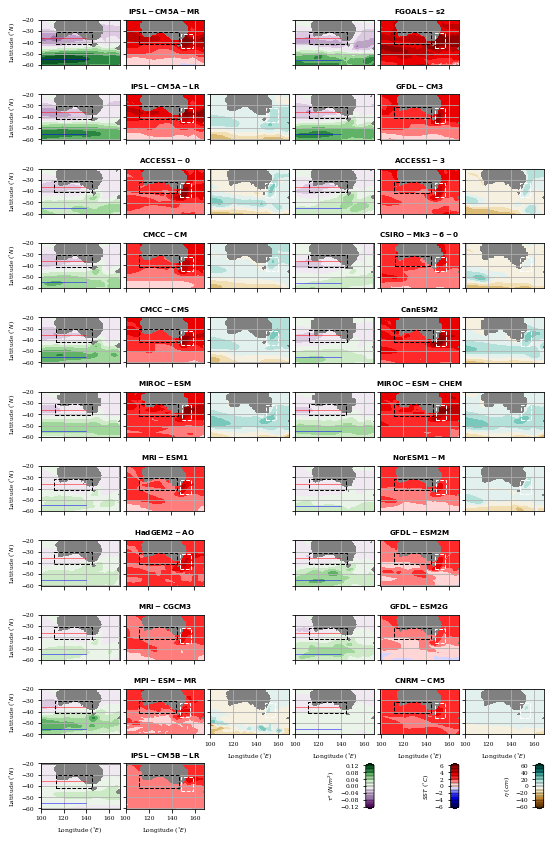

In [53]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

matplotlib.rcParams.update({'font.size': 6}) 
row = 11
col = 6
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(7.5,11.5)

lat_N = -20
lat_S = -60
lon_W = 100
lon_E = 170

lat_neg = -36
lat_pos = -55
lon_negW = 100
lon_negE = 140

count = -1
p = 0
for idx, t in enumerate(sorted_models):
    print(t)
    count += 1
    if count == 2:
        count = 0
        p += 1
    
    ax = plt.subplot2grid((row, col), (p, count*3))
    cmap = plt.get_cmap('PRGn')
    step = 0.02
    contf_lvls = np.arange(-0.12,0.12+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N_idx = find_nearest_index(tauuo_lat[t], lat_N)
    lat_S_idx = find_nearest_index(tauuo_lat[t], lat_S)
    lon_W_idx = find_nearest_index(tauuo_lon[t], lon_W)
    lon_E_idx = find_nearest_index(tauuo_lon[t], lon_E)
    contf = plt.contourf(
        tauuo_lon[t][lon_W_idx:lon_E_idx],
        tauuo_lat[t][lat_S_idx:lat_N_idx],
        tauuo_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
    lat_SAN_idx = find_nearest_index(tauuo_lat[t], lat_SAN)
    lat_SAS_idx = find_nearest_index(tauuo_lat[t], lat_SAS)
    lon_SAW_idx = find_nearest_index(tauuo_lon[t], lon_SAW)
    lon_SAE_idx = find_nearest_index(tauuo_lon[t], lon_SAE)
    plt.plot(
        [tauuo_lon[t][lon_SAW_idx],
         tauuo_lon[t][lon_SAE_idx],
         tauuo_lon[t][lon_SAE_idx],
         tauuo_lon[t][lon_SAW_idx],
         tauuo_lon[t][lon_SAW_idx]],
        [tauuo_lat[t][lat_SAS_idx],
         tauuo_lat[t][lat_SAS_idx],
         tauuo_lat[t][lat_SAN_idx],
         tauuo_lat[t][lat_SAN_idx],
         tauuo_lat[t][lat_SAS_idx]], '--k', linewidth = 1)
    
    plt.plot(
        [lon_negW,
         lon_negE],
        [lat_neg,
         lat_neg], 'r', linewidth = 0.5)
    plt.plot(
        [lon_negW,
         lon_negE],
        [lat_pos,
         lat_pos], 'b', linewidth = 0.5)
    
    plt.xticks([100, 120, 140, 160])
    plt.yticks([-20, -30, -40, -50, -60])
    if count == 1:
        plt.gca().set_yticklabels('')
    else:
        plt.ylabel('Latitude ($^{\circ}N$)')
    if p == row-1 or p == row-2 and count == 1:
        plt.xlabel('Longitude ($^{\circ}E$)')
        pass
    else:
        plt.gca().set_xticklabels('')
#     ax.text(120, -27, str(tauuo_SA_sorted[idx]))
#     ax.set_title(t)
    plt.grid()
    plt.xlim([lon_W, 169])
    if idx == len(sorted_models)-1:
        ax = plt.subplot2grid((row, col), (p, count*3+3), colspan=1)
        ax_divider = make_axes_locatable(ax)
        cax = ax_divider.append_axes("right", size="12%", pad="2%")
        cbar = plt.colorbar(contf, cax=cax, orientation='vertical', drawedges=True)
        cbar.set_label(r'$\tau^{x}$ ($N/m^{2}$)') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        cbar.ax.yaxis.tick_left()
        cbar.ax.yaxis.set_label_position('left')
        ax.axis('off')
        
        
    ax = plt.subplot2grid((row, col), (p, count*3+1))
    cmap = plt.get_cmap('seismic')
    step = 1
    contf_lvls = np.arange(-6,6+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N_idx = find_nearest_index(thetao_lat[t], lat_N)
    lat_S_idx = find_nearest_index(thetao_lat[t], lat_S)
    lon_W_idx = find_nearest_index(thetao_lon[t], lon_W)
    lon_E_idx = find_nearest_index(thetao_lon[t], lon_E)
    contf = plt.contourf(
        thetao_lon[t][lon_W_idx:lon_E_idx],
        thetao_lat[t][lat_S_idx:lat_N_idx],
        thetao_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
    lat_SAN_idx = find_nearest_index(thetao_lat[t], lat_SAN)
    lat_SAS_idx = find_nearest_index(thetao_lat[t], lat_SAS)
    lon_SAW_idx = find_nearest_index(thetao_lon[t], lon_SAW)
    lon_SAE_idx = find_nearest_index(thetao_lon[t], lon_SAE)
    plt.plot(
        [thetao_lon[t][lon_SAW_idx],
         thetao_lon[t][lon_SAE_idx],
         thetao_lon[t][lon_SAE_idx],
         thetao_lon[t][lon_SAW_idx],
         thetao_lon[t][lon_SAW_idx]],
        [thetao_lat[t][lat_SAS_idx],
         thetao_lat[t][lat_SAS_idx],
         thetao_lat[t][lat_SAN_idx],
         thetao_lat[t][lat_SAN_idx],
         thetao_lat[t][lat_SAS_idx]], '--k', linewidth = 1)
    lat_TSN_idx = find_nearest_index(thetao_lat[t], lat_TSN)
    lat_TSS_idx = find_nearest_index(thetao_lat[t], lat_TSS)
    lon_TSW_idx = find_nearest_index(thetao_lon[t], lon_TSW)
    lon_TSE_idx = find_nearest_index(thetao_lon[t], lon_TSE)
    plt.plot(
        [thetao_lon[t][lon_TSW_idx],
         thetao_lon[t][lon_TSE_idx],
         thetao_lon[t][lon_TSE_idx],
         thetao_lon[t][lon_TSW_idx],
         thetao_lon[t][lon_TSW_idx]],
        [thetao_lat[t][lat_TSS_idx],
         thetao_lat[t][lat_TSS_idx],
         thetao_lat[t][lat_TSN_idx],
         thetao_lat[t][lat_TSN_idx],
         thetao_lat[t][lat_TSS_idx]], '--w', linewidth = 1)
    plt.xticks([100, 120, 140, 160])
    plt.yticks([-20, -30, -40, -50, -60])
    plt.gca().set_yticklabels('')
    if p == row-1 or p == row-2 and count == 1:
        plt.xlabel('Longitude ($^{\circ}E$)')
        pass
    else:
        plt.gca().set_xticklabels('')
    ax.set_title(r"$\bf{" + t + "}$")
    plt.grid()
    if idx == len(sorted_models)-1:
        ax = plt.subplot2grid((row, col), (p, count*3+4), colspan=1)
        ax_divider = make_axes_locatable(ax)
        cax = ax_divider.append_axes("right", size="12%", pad="2%")
        cbar = plt.colorbar(contf, cax=cax, orientation='vertical', drawedges=True)
        cbar.set_label(r'$SST$ ($^{\circ}C$)') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        cbar.ax.yaxis.tick_left()
        cbar.ax.yaxis.set_label_position('left')
        ax.axis('off')
        
    
    if t not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        ax = plt.subplot2grid((row, col), (p, count*3+2))
        cmap = plt.get_cmap('BrBG')
        step = 10
        contf_lvls = np.arange(-60,60+1e-08,step)              
        ax.set_facecolor('grey')
        lat_N_idx = find_nearest_index(zos_lat[t], lat_N)
        lat_S_idx = find_nearest_index(zos_lat[t], lat_S)
        lon_W_idx = find_nearest_index(zos_lon[t], lon_W)
        lon_E_idx = find_nearest_index(zos_lon[t], lon_E)
        contf = plt.contourf(
            zos_lon[t][lon_W_idx:lon_E_idx],
            zos_lat[t][lat_S_idx:lat_N_idx],
            zos_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
        lat_TSN_idx = find_nearest_index(zos_lat[t], lat_TSN)
        lat_TSS_idx = find_nearest_index(zos_lat[t], lat_TSS)
        lon_TSW_idx = find_nearest_index(zos_lon[t], lon_TSW)
        lon_TSE_idx = find_nearest_index(zos_lon[t], lon_TSE)
        plt.plot(
            [zos_lon[t][lon_TSW_idx],
             zos_lon[t][lon_TSE_idx],
             zos_lon[t][lon_TSE_idx],
             zos_lon[t][lon_TSW_idx],
             zos_lon[t][lon_TSW_idx]],
            [zos_lat[t][lat_TSS_idx],
             zos_lat[t][lat_TSS_idx],
             zos_lat[t][lat_TSN_idx],
             zos_lat[t][lat_TSN_idx],
             zos_lat[t][lat_TSS_idx]], '--w', linewidth = 1)
        plt.xticks([100, 120, 140, 160])
        plt.yticks([-20, -30, -40, -50, -60])
        plt.gca().set_yticklabels('')
        if p == row-1 or p == row-2 and count == 1 or t == 'MPI-ESM-MR':
            pass
            plt.xlabel('Longitude ($^{\circ}E$)')
        else:
            plt.gca().set_xticklabels('')
#         ax.set_title(t)
        plt.grid()
    if idx == len(sorted_models)-2:
        ax = plt.subplot2grid((row, col), (p+1, count*3+2), colspan=1)
        ax_divider = make_axes_locatable(ax)
        cax = ax_divider.append_axes("right", size="12%", pad="2%")
        cbar = plt.colorbar(contf, cax=cax, orientation='vertical', drawedges=True)
        cbar.set_label(r'$\eta$ ($cm$)') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        cbar.ax.yaxis.tick_left()
        cbar.ax.yaxis.set_label_position('left')
        ax.axis('off')
        
fig.tight_layout(pad=0, w_pad=-3, h_pad=-0.1)

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
# plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
#             + '_fig2_' + '.png', bbox_inches='tight', dpi=300)
    
    

IPSL-CM5A-MR
Bbox(x0=0.125, y0=0.821923076923077, x1=0.21951219512195125, y1=0.88)
[0.125, 0.836923076923077, 0.22951219512195126, 0.88]
Bbox(x0=0.23841463414634148, y0=0.821923076923077, x1=0.3329268292682927, y1=0.88)
[0.23841463414634148, 0.836923076923077, 0.3429268292682927, 0.88]
FGOALS-s2
Bbox(x0=0.578658536585366, y0=0.821923076923077, x1=0.6731707317073172, y1=0.88)
[0.528658536585366, 0.836923076923077, 0.6331707317073172, 0.88]
Bbox(x0=0.6920731707317075, y0=0.821923076923077, x1=0.7865853658536587, y1=0.88)
[0.6420731707317074, 0.836923076923077, 0.7465853658536586, 0.88]
IPSL-CM5A-LR
Bbox(x0=0.125, y0=0.7522307692307693, x1=0.21951219512195125, y1=0.8103076923076923)
[0.125, 0.7672307692307693, 0.22951219512195126, 0.8103076923076923]
Bbox(x0=0.23841463414634148, y0=0.7522307692307693, x1=0.3329268292682927, y1=0.8103076923076923)
[0.23841463414634148, 0.7672307692307693, 0.3429268292682927, 0.8103076923076923]
Bbox(x0=0.35182926829268296, y0=0.7522307692307693, x1=0.44634

Bbox(x0=0.23841463414634148, y0=0.19469230769230783, x1=0.3329268292682927, y1=0.25276923076923086)
[0.23841463414634148, 0.20969230769230784, 0.3429268292682927, 0.25276923076923086]
Bbox(x0=0.35182926829268296, y0=0.19469230769230783, x1=0.4463414634146342, y1=0.25276923076923086)
[0.35182926829268296, 0.20969230769230784, 0.4563414634146342, 0.25276923076923086]
CNRM-CM5
Bbox(x0=0.578658536585366, y0=0.19469230769230783, x1=0.6731707317073172, y1=0.25276923076923086)
[0.528658536585366, 0.20969230769230784, 0.6331707317073172, 0.25276923076923086]
Bbox(x0=0.6920731707317075, y0=0.19469230769230783, x1=0.7865853658536587, y1=0.25276923076923086)
[0.6420731707317074, 0.20969230769230784, 0.7465853658536586, 0.25276923076923086]
Bbox(x0=0.8054878048780489, y0=0.19469230769230783, x1=0.9000000000000001, y1=0.25276923076923086)
[0.7554878048780489, 0.20969230769230784, 0.8600000000000001, 0.25276923076923086]
IPSL-CM5B-LR
Bbox(x0=0.125, y0=0.12500000000000022, x1=0.21951219512195125, y1=

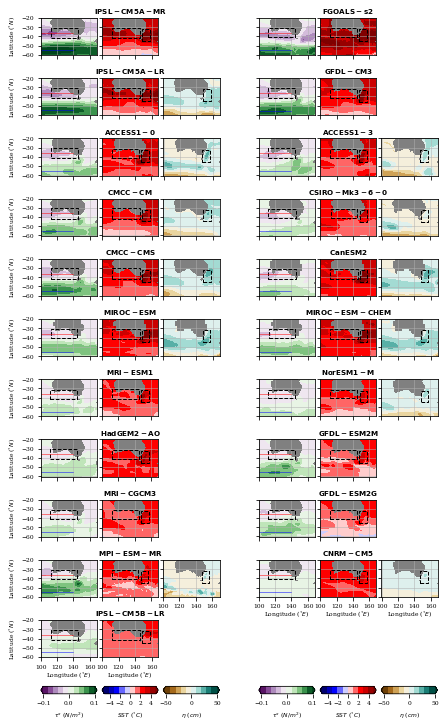

In [7]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

matplotlib.rcParams.update({'font.size': 6}) 
row = 11
col = 7
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(7.5,12)

lat_N = -20
lat_S = -60
lon_W = 100
lon_E = 170

lat_neg = -36
lat_pos = -55
lon_negW = 100
lon_negE = 140

count = -1
p = 0
j = -1
for idx, t in enumerate(sorted_models):
    print(t)
    count += 1
    j += 1
    if count == 2:
        count = 0
        p += 1
        j = 0
    
    ax = plt.subplot2grid((row, col), (p, count*3+j))
    pos = ax.get_position()
    print(pos)
    if count == 0:
        pos_plot = [pos.x0, pos.y0+0.015, pos.x1+0.01, pos.y1]
    else:
        pos_plot = [pos.x0-0.05, pos.y0+0.015, pos.x1-0.04, pos.y1]
    print(pos_plot)

    cmap = plt.get_cmap('PRGn')
    step = 0.02
    contf_lvls = np.arange(-0.1,0.1+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N_idx = find_nearest_index(tauuo_lat[t], lat_N)
    lat_S_idx = find_nearest_index(tauuo_lat[t], lat_S)
    lon_W_idx = find_nearest_index(tauuo_lon[t], lon_W)
    lon_E_idx = find_nearest_index(tauuo_lon[t], lon_E)
    plot = contf = plt.contourf(
        tauuo_lon[t][lon_W_idx:lon_E_idx],
        tauuo_lat[t][lat_S_idx:lat_N_idx],
        tauuo_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
    lat_SAN_idx = find_nearest_index(tauuo_lat[t], lat_SAN)
    lat_SAS_idx = find_nearest_index(tauuo_lat[t], lat_SAS)
    lon_SAW_idx = find_nearest_index(tauuo_lon[t], lon_SAW)
    lon_SAE_idx = find_nearest_index(tauuo_lon[t], lon_SAE)
    plt.plot(
        [tauuo_lon[t][lon_SAW_idx],
         tauuo_lon[t][lon_SAE_idx],
         tauuo_lon[t][lon_SAE_idx],
         tauuo_lon[t][lon_SAW_idx],
         tauuo_lon[t][lon_SAW_idx]],
        [tauuo_lat[t][lat_SAS_idx],
         tauuo_lat[t][lat_SAS_idx],
         tauuo_lat[t][lat_SAN_idx],
         tauuo_lat[t][lat_SAN_idx],
         tauuo_lat[t][lat_SAS_idx]], '--k', linewidth = 1)
    
    plt.plot(
        [lon_negW,
         lon_negE],
        [lat_neg,
         lat_neg], 'r', linewidth = 0.5)
    plt.plot(
        [lon_negW,
         lon_negE],
        [lat_pos,
         lat_pos], 'b', linewidth = 0.5)
    ax.set_position(bbox(pos_plot))
    
    plt.xticks([100, 120, 140, 160])
    plt.yticks([-20, -30, -40, -50, -60])
    if count == 1:
        plt.gca().set_yticklabels('')
    else:
        plt.ylabel('Latitude ($^{\circ}N$)')
        
#     if p == row or p == row-1 and count == 1:
    if p == row-1 or p == row-2 and count == 1:
        plt.xlabel('Longitude ($^{\circ}E$)', labelpad=0)
    else:
        plt.gca().set_xticklabels('')
#     ax.text(120, -27, str(tauuo_SA_sorted[idx]))
#     ax.set_title(t)
    plt.grid(linewidth = 0.5)
    plt.xlim([lon_W, 169])
    if p == row-2:
        axins = inset_axes(ax,
                   width="100%",  # width = 5% of parent_bbox width
                   height="20%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -2.6, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
        cbar = plt.colorbar(plot, orientation='horizontal',
                    label=r'$\tau^{x}$ ($N/m^{2}$)', ticks=[-0.1, 0, 0.1], cax=axins)
#         cbar.ax.set_xticks([-0.1, 0, 0.1])
        
    ax = plt.subplot2grid((row, col), (p, count*3+1+j))
    pos = ax.get_position()
    print(pos)
    if count == 0:
        pos_plot = [pos.x0, pos.y0+0.015, pos.x1+0.01, pos.y1]
    else:
        pos_plot = [pos.x0-0.05, pos.y0+0.015, pos.x1-0.04, pos.y1]
    print(pos_plot)
    
    cmap = plt.get_cmap('seismic')
    step = 1
    contf_lvls = np.arange(-5,5+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N_idx = find_nearest_index(thetao_lat[t], lat_N)
    lat_S_idx = find_nearest_index(thetao_lat[t], lat_S)
    lon_W_idx = find_nearest_index(thetao_lon[t], lon_W)
    lon_E_idx = find_nearest_index(thetao_lon[t], lon_E)
    contf = plt.contourf(
        thetao_lon[t][lon_W_idx:lon_E_idx],
        thetao_lat[t][lat_S_idx:lat_N_idx],
        thetao_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
    lat_SAN_idx = find_nearest_index(thetao_lat[t], lat_SAN)
    lat_SAS_idx = find_nearest_index(thetao_lat[t], lat_SAS)
    lon_SAW_idx = find_nearest_index(thetao_lon[t], lon_SAW)
    lon_SAE_idx = find_nearest_index(thetao_lon[t], lon_SAE)
    plt.plot(
        [thetao_lon[t][lon_SAW_idx],
         thetao_lon[t][lon_SAE_idx],
         thetao_lon[t][lon_SAE_idx],
         thetao_lon[t][lon_SAW_idx],
         thetao_lon[t][lon_SAW_idx]],
        [thetao_lat[t][lat_SAS_idx],
         thetao_lat[t][lat_SAS_idx],
         thetao_lat[t][lat_SAN_idx],
         thetao_lat[t][lat_SAN_idx],
         thetao_lat[t][lat_SAS_idx]], '--k', linewidth = 1)
    lat_TSN_idx = find_nearest_index(thetao_lat[t], lat_TSN)
    lat_TSS_idx = find_nearest_index(thetao_lat[t], lat_TSS)
    lon_TSW_idx = find_nearest_index(thetao_lon[t], lon_TSW)
    lon_TSE_idx = find_nearest_index(thetao_lon[t], lon_TSE)
    plt.plot(
        [thetao_lon[t][lon_TSW_idx],
         thetao_lon[t][lon_TSE_idx],
         thetao_lon[t][lon_TSE_idx],
         thetao_lon[t][lon_TSW_idx],
         thetao_lon[t][lon_TSW_idx]],
        [thetao_lat[t][lat_TSS_idx],
         thetao_lat[t][lat_TSS_idx],
         thetao_lat[t][lat_TSN_idx],
         thetao_lat[t][lat_TSN_idx],
         thetao_lat[t][lat_TSS_idx]], '--k', linewidth = 1)
    ax.set_position(bbox(pos_plot))
    plt.xticks([100, 120, 140, 160])
    plt.yticks([-20, -30, -40, -50, -60])
    plt.gca().set_yticklabels('')
    if p == row-1 or p == row-2 and count == 1:
        plt.xlabel('Longitude ($^{\circ}E$)', labelpad=0)
        pass
    else:
        plt.gca().set_xticklabels('')
    ax.set_title(r"$\bf{" + t + "}$", y=0.95)
    plt.grid(linewidth = 0.5)
    if p == row-2:
        axins = inset_axes(ax,
                   width="100%",  # width = 5% of parent_bbox width
                   height="20%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -2.6, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
        cbar = plt.colorbar(contf, orientation='horizontal',
                    label=r'$SST$ ($^{\circ}C$)', cax=axins)
        cbar.ax.set_xticklabels(cbar.ax.get_xticklabels())
        
    
    if t not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        ax = plt.subplot2grid((row, col), (p, count*3+2+j))
        pos = ax.get_position()
        print(pos)
        if count == 0:
            pos_plot = [pos.x0, pos.y0+0.015, pos.x1+0.01, pos.y1]
        else:
            pos_plot = [pos.x0-0.05, pos.y0+0.015, pos.x1-0.04, pos.y1]
        print(pos_plot)
        cmap = plt.get_cmap('BrBG')
        step = 10
        contf_lvls = np.arange(-50,50+1e-08,step)              
        ax.set_facecolor('grey')
        lat_N_idx = find_nearest_index(zos_lat[t], lat_N)
        lat_S_idx = find_nearest_index(zos_lat[t], lat_S)
        lon_W_idx = find_nearest_index(zos_lon[t], lon_W)
        lon_E_idx = find_nearest_index(zos_lon[t], lon_E)
        contf = plt.contourf(
            zos_lon[t][lon_W_idx:lon_E_idx],
            zos_lat[t][lat_S_idx:lat_N_idx],
            zos_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
        lat_TSN_idx = find_nearest_index(zos_lat[t], lat_TSN)
        lat_TSS_idx = find_nearest_index(zos_lat[t], lat_TSS)
        lon_TSW_idx = find_nearest_index(zos_lon[t], lon_TSW)
        lon_TSE_idx = find_nearest_index(zos_lon[t], lon_TSE)
        plt.plot(
            [zos_lon[t][lon_TSW_idx],
             zos_lon[t][lon_TSE_idx],
             zos_lon[t][lon_TSE_idx],
             zos_lon[t][lon_TSW_idx],
             zos_lon[t][lon_TSW_idx]],
            [zos_lat[t][lat_TSS_idx],
             zos_lat[t][lat_TSS_idx],
             zos_lat[t][lat_TSN_idx],
             zos_lat[t][lat_TSN_idx],
             zos_lat[t][lat_TSS_idx]], '--k', linewidth = 1)
        ax.set_position(bbox(pos_plot))
        plt.xticks([100, 120, 140, 160])
        plt.yticks([-20, -30, -40, -50, -60])
        plt.gca().set_yticklabels('')
        if p == row-1 or p == row-2 and count == 1:
            plt.xlabel('Longitude ($^{\circ}E$)', labelpad=0)
        elif p == row-2 and count == 0:
            pass
        else:
            plt.gca().set_xticklabels('')
        plt.grid(linewidth = 0.5)
        if p == row-2:
            axins = inset_axes(ax,
                       width="100%",  # width = 5% of parent_bbox width
                       height="20%",  # height : 50%
                       loc='lower left',
                       bbox_to_anchor=(0, -2.6, 1, 1),
                       bbox_transform=ax.transAxes,
                       borderpad=0)
            cbar = plt.colorbar(contf, orientation='horizontal',
                        label=r'$\eta$ ($cm$)', ticks=[-50,0,50], cax=axins)
    
#     if idx == len(sorted_models)-2:
#         ax = plt.subplot2grid((row, col), (p+1, count*3+2), colspan=1)
#         ax_divider = make_axes_locatable(ax)
#         cax = ax_divider.append_axes("right", size="12%", pad="2%")
#         cbar = plt.colorbar(contf, cax=cax, orientation='vertical', drawedges=True)
#         cbar.set_label(r'$\eta$ ($cm$)') 
#         cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
#         cbar.ax.yaxis.tick_left()
#         cbar.ax.yaxis.set_label_position('left')
#         ax.axis('off')
        
# fig.tight_layout(pad=0, w_pad=-3, h_pad=-0.1)

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig3_' + '.png', bbox_inches='tight', dpi=300)
    
    

IPSL-CM5A-MR
Bbox(x0=0.125, y0=0.821923076923077, x1=0.21951219512195125, y1=0.88)
[0.125, 0.836923076923077, 0.22951219512195126, 0.88]
Bbox(x0=0.23841463414634148, y0=0.821923076923077, x1=0.3329268292682927, y1=0.88)
[0.23841463414634148, 0.836923076923077, 0.3429268292682927, 0.88]
FGOALS-s2
Bbox(x0=0.578658536585366, y0=0.821923076923077, x1=0.6731707317073172, y1=0.88)
[0.528658536585366, 0.836923076923077, 0.6331707317073172, 0.88]
Bbox(x0=0.6920731707317075, y0=0.821923076923077, x1=0.7865853658536587, y1=0.88)
[0.6420731707317074, 0.836923076923077, 0.7465853658536586, 0.88]
IPSL-CM5A-LR
Bbox(x0=0.125, y0=0.7522307692307693, x1=0.21951219512195125, y1=0.8103076923076923)
[0.125, 0.7672307692307693, 0.22951219512195126, 0.8103076923076923]
Bbox(x0=0.23841463414634148, y0=0.7522307692307693, x1=0.3329268292682927, y1=0.8103076923076923)
[0.23841463414634148, 0.7672307692307693, 0.3429268292682927, 0.8103076923076923]
Bbox(x0=0.35182926829268296, y0=0.7522307692307693, x1=0.44634

Bbox(x0=0.35182926829268296, y0=0.19469230769230783, x1=0.4463414634146342, y1=0.25276923076923086)
[0.35182926829268296, 0.20969230769230784, 0.4563414634146342, 0.25276923076923086]
CNRM-CM5
Bbox(x0=0.578658536585366, y0=0.19469230769230783, x1=0.6731707317073172, y1=0.25276923076923086)
[0.528658536585366, 0.20969230769230784, 0.6331707317073172, 0.25276923076923086]
Bbox(x0=0.6920731707317075, y0=0.19469230769230783, x1=0.7865853658536587, y1=0.25276923076923086)
[0.6420731707317074, 0.20969230769230784, 0.7465853658536586, 0.25276923076923086]
Bbox(x0=0.8054878048780489, y0=0.19469230769230783, x1=0.9000000000000001, y1=0.25276923076923086)
[0.7554878048780489, 0.20969230769230784, 0.8600000000000001, 0.25276923076923086]
IPSL-CM5B-LR
Bbox(x0=0.125, y0=0.12500000000000022, x1=0.21951219512195125, y1=0.18307692307692325)
[0.125, 0.14000000000000024, 0.22951219512195126, 0.18307692307692325]
Bbox(x0=0.23841463414634148, y0=0.12500000000000022, x1=0.3329268292682927, y1=0.18307692307

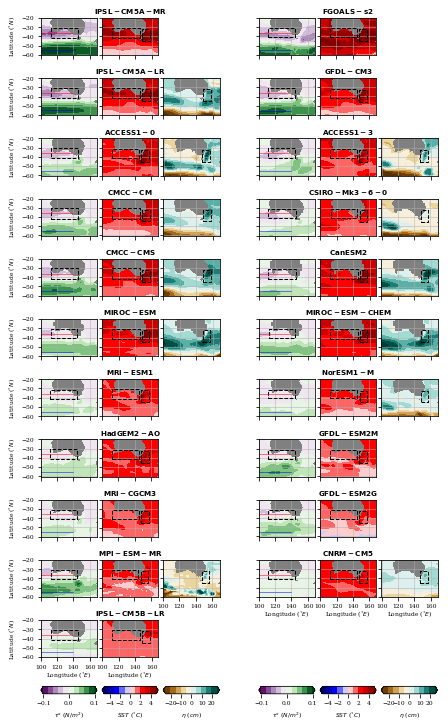

In [13]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

matplotlib.rcParams.update({'font.size': 6}) 
row = 11
col = 7
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(7.5,12)

lat_N = -20
lat_S = -60
lon_W = 100
lon_E = 170

lat_neg = -36
lat_pos = -55
lon_negW = 100
lon_negE = 140

count = -1
p = 0
j = -1
for idx, t in enumerate(sorted_models):
    print(t)
    count += 1
    j += 1
    if count == 2:
        count = 0
        p += 1
        j = 0
    
    ax = plt.subplot2grid((row, col), (p, count*3+j))
    pos = ax.get_position()
    print(pos)
    if count == 0:
        pos_plot = [pos.x0, pos.y0+0.015, pos.x1+0.01, pos.y1]
    else:
        pos_plot = [pos.x0-0.05, pos.y0+0.015, pos.x1-0.04, pos.y1]
    print(pos_plot)

    cmap = plt.get_cmap('PRGn')
    step = 0.02
    contf_lvls = np.arange(-0.1,0.1+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N_idx = find_nearest_index(tauuo_lat[t], lat_N)
    lat_S_idx = find_nearest_index(tauuo_lat[t], lat_S)
    lon_W_idx = find_nearest_index(tauuo_lon[t], lon_W)
    lon_E_idx = find_nearest_index(tauuo_lon[t], lon_E)
    plot = contf = plt.contourf(
        tauuo_lon[t][lon_W_idx:lon_E_idx],
        tauuo_lat[t][lat_S_idx:lat_N_idx],
        tauuo_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
    lat_SAN_idx = find_nearest_index(tauuo_lat[t], lat_SAN)
    lat_SAS_idx = find_nearest_index(tauuo_lat[t], lat_SAS)
    lon_SAW_idx = find_nearest_index(tauuo_lon[t], lon_SAW)
    lon_SAE_idx = find_nearest_index(tauuo_lon[t], lon_SAE)
    plt.plot(
        [tauuo_lon[t][lon_SAW_idx],
         tauuo_lon[t][lon_SAE_idx],
         tauuo_lon[t][lon_SAE_idx],
         tauuo_lon[t][lon_SAW_idx],
         tauuo_lon[t][lon_SAW_idx]],
        [tauuo_lat[t][lat_SAS_idx],
         tauuo_lat[t][lat_SAS_idx],
         tauuo_lat[t][lat_SAN_idx],
         tauuo_lat[t][lat_SAN_idx],
         tauuo_lat[t][lat_SAS_idx]], '--k', linewidth = 1)
    
    plt.plot(
        [lon_negW,
         lon_negE],
        [lat_neg,
         lat_neg], 'r', linewidth = 0.5)
    plt.plot(
        [lon_negW,
         lon_negE],
        [lat_pos,
         lat_pos], 'b', linewidth = 0.5)
    ax.set_position(bbox(pos_plot))
    
    plt.xticks([100, 120, 140, 160])
    plt.yticks([-20, -30, -40, -50, -60])
    if count == 1:
        plt.gca().set_yticklabels('')
    else:
        plt.ylabel('Latitude ($^{\circ}N$)')
        
#     if p == row or p == row-1 and count == 1:
    if p == row-1 or p == row-2 and count == 1:
        plt.xlabel('Longitude ($^{\circ}E$)', labelpad=0)
    else:
        plt.gca().set_xticklabels('')
#     ax.text(120, -27, str(tauuo_SA_sorted[idx]))
#     ax.set_title(t)
    plt.grid(linewidth = 0.5)
    plt.xlim([lon_W, 169])
    if p == row-2:
        axins = inset_axes(ax,
                   width="100%",  # width = 5% of parent_bbox width
                   height="20%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -2.6, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
        cbar = plt.colorbar(plot, orientation='horizontal',
                    label=r'$\tau^{x}$ ($N/m^{2}$)', ticks=[-0.1, 0, 0.1], cax=axins)
#         cbar.ax.set_xticks([-0.1, 0, 0.1])
        
    ax = plt.subplot2grid((row, col), (p, count*3+1+j))
    pos = ax.get_position()
    print(pos)
    if count == 0:
        pos_plot = [pos.x0, pos.y0+0.015, pos.x1+0.01, pos.y1]
    else:
        pos_plot = [pos.x0-0.05, pos.y0+0.015, pos.x1-0.04, pos.y1]
    print(pos_plot)
    
    cmap = plt.get_cmap('seismic')
    step = 1
    contf_lvls = np.arange(-5,5+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N_idx = find_nearest_index(thetao_lat[t], lat_N)
    lat_S_idx = find_nearest_index(thetao_lat[t], lat_S)
    lon_W_idx = find_nearest_index(thetao_lon[t], lon_W)
    lon_E_idx = find_nearest_index(thetao_lon[t], lon_E)
    contf = plt.contourf(
        thetao_lon[t][lon_W_idx:lon_E_idx],
        thetao_lat[t][lat_S_idx:lat_N_idx],
        thetao_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
    lat_SAN_idx = find_nearest_index(thetao_lat[t], lat_SAN)
    lat_SAS_idx = find_nearest_index(thetao_lat[t], lat_SAS)
    lon_SAW_idx = find_nearest_index(thetao_lon[t], lon_SAW)
    lon_SAE_idx = find_nearest_index(thetao_lon[t], lon_SAE)
    plt.plot(
        [thetao_lon[t][lon_SAW_idx],
         thetao_lon[t][lon_SAE_idx],
         thetao_lon[t][lon_SAE_idx],
         thetao_lon[t][lon_SAW_idx],
         thetao_lon[t][lon_SAW_idx]],
        [thetao_lat[t][lat_SAS_idx],
         thetao_lat[t][lat_SAS_idx],
         thetao_lat[t][lat_SAN_idx],
         thetao_lat[t][lat_SAN_idx],
         thetao_lat[t][lat_SAS_idx]], '--k', linewidth = 1)
    lat_TSN_idx = find_nearest_index(thetao_lat[t], lat_TSN)
    lat_TSS_idx = find_nearest_index(thetao_lat[t], lat_TSS)
    lon_TSW_idx = find_nearest_index(thetao_lon[t], lon_TSW)
    lon_TSE_idx = find_nearest_index(thetao_lon[t], lon_TSE)
    plt.plot(
        [thetao_lon[t][lon_TSW_idx],
         thetao_lon[t][lon_TSE_idx],
         thetao_lon[t][lon_TSE_idx],
         thetao_lon[t][lon_TSW_idx],
         thetao_lon[t][lon_TSW_idx]],
        [thetao_lat[t][lat_TSS_idx],
         thetao_lat[t][lat_TSS_idx],
         thetao_lat[t][lat_TSN_idx],
         thetao_lat[t][lat_TSN_idx],
         thetao_lat[t][lat_TSS_idx]], '--k', linewidth = 1)
    ax.set_position(bbox(pos_plot))
    plt.xticks([100, 120, 140, 160])
    plt.yticks([-20, -30, -40, -50, -60])
    plt.gca().set_yticklabels('')
    if p == row-1 or p == row-2 and count == 1:
        plt.xlabel('Longitude ($^{\circ}E$)', labelpad=0)
        pass
    else:
        plt.gca().set_xticklabels('')
    ax.set_title(r"$\bf{" + t + "}$", y=0.95)
    plt.grid(linewidth = 0.5)
    if p == row-2:
        axins = inset_axes(ax,
                   width="100%",  # width = 5% of parent_bbox width
                   height="20%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -2.6, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
        cbar = plt.colorbar(contf, orientation='horizontal',
                    label=r'$SST$ ($^{\circ}C$)', cax=axins)
        cbar.ax.set_xticklabels(cbar.ax.get_xticklabels())
        
    
    if t not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        ax = plt.subplot2grid((row, col), (p, count*3+2+j))
        pos = ax.get_position()
        print(pos)
        if count == 0:
            pos_plot = [pos.x0, pos.y0+0.015, pos.x1+0.01, pos.y1]
        else:
            pos_plot = [pos.x0-0.05, pos.y0+0.015, pos.x1-0.04, pos.y1]
        print(pos_plot)
        cmap = plt.get_cmap('BrBG')
        step = 5
        contf_lvls = np.arange(-25,25+1e-08,step)              
        ax.set_facecolor('grey')
        lat_N_idx = find_nearest_index(zos_lat[t], lat_N)
        lat_S_idx = find_nearest_index(zos_lat[t], lat_S)
        lon_W_idx = find_nearest_index(zos_lon[t], lon_W)
        lon_E_idx = find_nearest_index(zos_lon[t], lon_E)
        contf = plt.contourf(
            zos_lon[t][lon_W_idx:lon_E_idx],
            zos_lat[t][lat_S_idx:lat_N_idx],
            zos_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
        lat_TSN_idx = find_nearest_index(zos_lat[t], lat_TSN)
        lat_TSS_idx = find_nearest_index(zos_lat[t], lat_TSS)
        lon_TSW_idx = find_nearest_index(zos_lon[t], lon_TSW)
        lon_TSE_idx = find_nearest_index(zos_lon[t], lon_TSE)
        plt.plot(
            [zos_lon[t][lon_TSW_idx],
             zos_lon[t][lon_TSE_idx],
             zos_lon[t][lon_TSE_idx],
             zos_lon[t][lon_TSW_idx],
             zos_lon[t][lon_TSW_idx]],
            [zos_lat[t][lat_TSS_idx],
             zos_lat[t][lat_TSS_idx],
             zos_lat[t][lat_TSN_idx],
             zos_lat[t][lat_TSN_idx],
             zos_lat[t][lat_TSS_idx]], '--k', linewidth = 1)
        ax.set_position(bbox(pos_plot))
        plt.xticks([100, 120, 140, 160])
        plt.yticks([-20, -30, -40, -50, -60])
        plt.gca().set_yticklabels('')
        if p == row-1 or p == row-2 and count == 1:
            plt.xlabel('Longitude ($^{\circ}E$)', labelpad=0)
        elif p == row-2 and count == 0:
            pass
        else:
            plt.gca().set_xticklabels('')
        plt.grid(linewidth = 0.5)
        if p == row-2:
            axins = inset_axes(ax,
                       width="100%",  # width = 5% of parent_bbox width
                       height="20%",  # height : 50%
                       loc='lower left',
                       bbox_to_anchor=(0, -2.6, 1, 1),
                       bbox_transform=ax.transAxes,
                       borderpad=0)
            cbar = plt.colorbar(contf, orientation='horizontal',
                        label=r'$\eta$ ($cm$)', ticks=[-20,-10,0,10,20], cax=axins)
    
#     if idx == len(sorted_models)-2:
#         ax = plt.subplot2grid((row, col), (p+1, count*3+2), colspan=1)
#         ax_divider = make_axes_locatable(ax)
#         cax = ax_divider.append_axes("right", size="12%", pad="2%")
#         cbar = plt.colorbar(contf, cax=cax, orientation='vertical', drawedges=True)
#         cbar.set_label(r'$\eta$ ($cm$)') 
#         cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
#         cbar.ax.yaxis.tick_left()
#         cbar.ax.yaxis.set_label_position('left')
#         ax.axis('off')
        
# fig.tight_layout(pad=0, w_pad=-3, h_pad=-0.1)

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig3_forZhang' + '.png', bbox_inches='tight', dpi=300)
    
    